In [141]:
# Notebook based on https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

#path = '/kaggle'
#path = '/tmp/working/' # Standard kaggle container data path
path = '/tmp/working/tmp/kaggle-gearbox-analysis/data' # "./"
input_path = path + '/input/gearbox-fault-diagnosis-elaborated-datasets/stdev/'
broken_dataset  = "broken30hz_stdev_100.csv"
healthy_dataset = "healthy30hz_stdev_100.csv"

# Exploring the dataset

In [142]:
# IMPORT DATASETS
healthyDataset = pd.read_csv(input_path + healthy_dataset)
brokenDataset = pd.read_csv(input_path + broken_dataset)
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,failure
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000
mean,5.766842,4.266330,3.847555,4.276706,45.644706,0.497401
std,2.219236,1.162870,1.020591,1.228792,28.660383,0.500006
min,1.468928,1.272738,0.990336,1.111679,0.000000,0.000000
25%,4.164285,3.473209,3.118392,3.409206,20.000000,0.000000
50%,5.337988,4.146414,3.779156,4.211713,50.000000,0.000000
75%,7.003621,4.903647,4.521386,5.078614,70.000000,1.000000
max,23.909199,10.984053,8.273939,10.609798,90.000000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

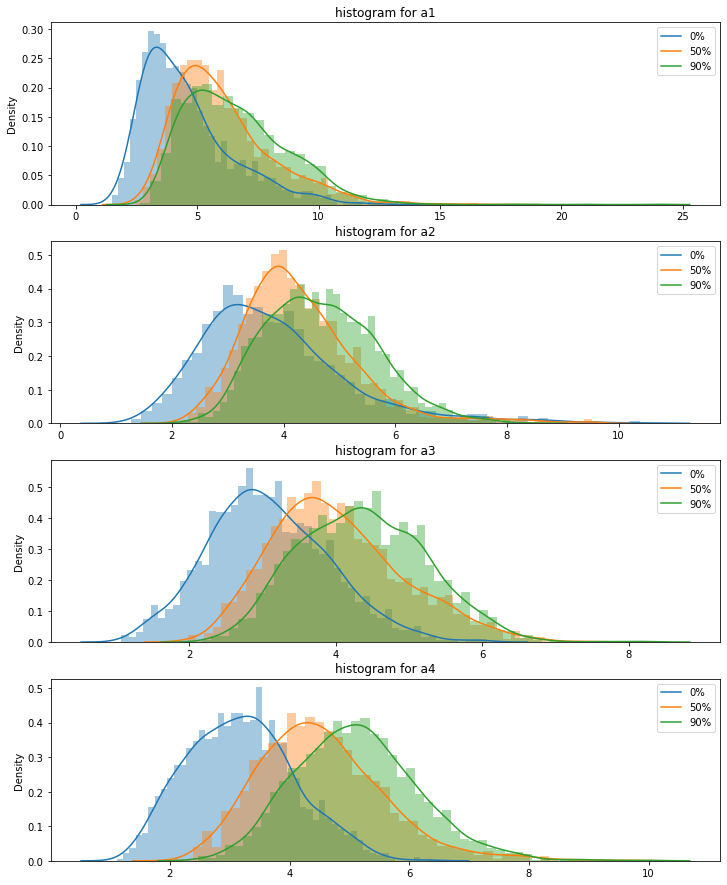

In [143]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

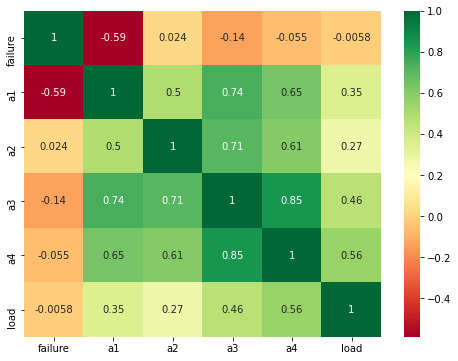

In [144]:
# Broken and healthy gearbox at once
rcParams['figure.figsize'] = 8, 6
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

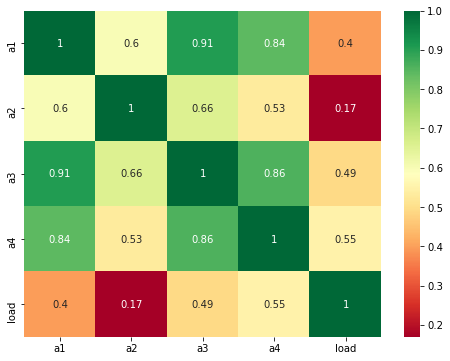

In [145]:
# Healthy gearbox
dataset0 = dataset[dataset.failure == 0]
columns = ['a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset0[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

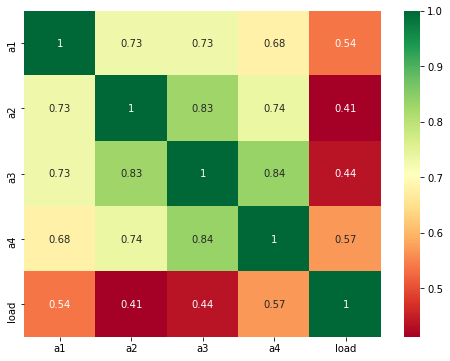

In [146]:
# Broken gearbox
dataset1 = dataset[dataset.failure == 1]
columns = ['a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset1[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

## Histograms

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

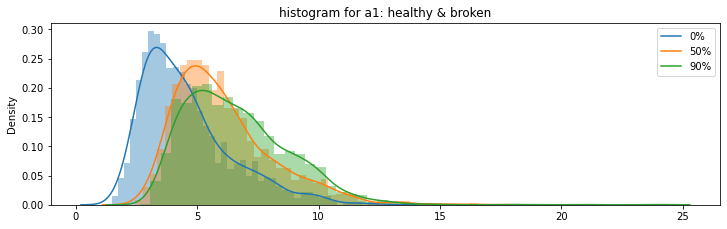

In [147]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1']]): # [['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

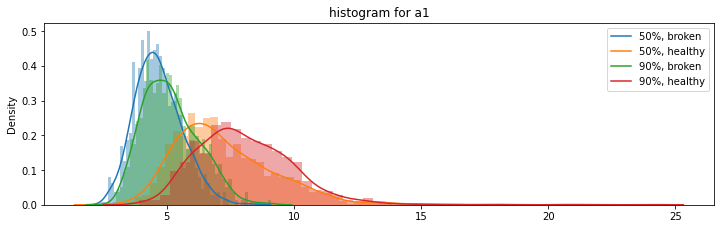

In [148]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1']]): # [['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][ (dataset.load == 50) & (dataset.failure == 1) ], bins=50)
    sns.distplot(dataset[cn][ (dataset.load == 50) & (dataset.failure == 0)  ], bins=50)
    sns.distplot(dataset[cn][ (dataset.load == 90) & (dataset.failure == 1) ], bins=50)
    sns.distplot(dataset[cn][ (dataset.load == 90) & (dataset.failure == 0)  ], bins=50)
    ax.set_xlabel('')
    plt.legend(['50%, broken', '50%, healthy','90%, broken', '90%, healthy'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

# Multinomial logistic regression

In [149]:
# Predictor variable (features)
columns = ['a1', 'a2', 'a3', 'a4']

X = healthyDataset[columns]
# Target variable: Load
y = healthyDataset[['load']]

In [150]:
# Split the dataset: 80% train, 20% test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Setup the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

## Evaluate the model

In [151]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.201 (0.011)


## Train and prediction

In [152]:
# Train the model
model.fit(X_train, y_train)

# Predict Load for the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# Print np arrays with 2 decimal places, without scientifc notation
np.set_printoptions(suppress=True, precision=2)
print("Predicted probabilities test (first 10 rows): ", y_prob[:10])
print("Prediction for the test data (first 10 rows): ", y_pred[:10])
#print(X_test.iloc[:10,:])

# Actual loal for the test set
print("Actual load for the test data (first 10 rows):", np.array(y_test)[:,0][:10] )

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Predicted probabilities test (first 10 rows):  [0.02 0.27 0.07 0.04 0.25 0.03 0.09 0.02 0.04 0.  ]
Prediction for the test data (first 10 rows):  [80. 10. 60. 40.  0. 50. 30. 70. 40. 90.]
Actual load for the test data (first 10 rows): [40.  0. 70. 80. 30. 50. 30. 60. 80. 70.]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Evaluate the model

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[ 0.65  0.5  -1.23 -1.8 ]
 [ 0.62  0.52 -1.66 -1.26]
 [ 0.45  0.38 -1.15 -0.97]
 [ 0.1   0.01  0.02 -0.47]
 [-0.07 -0.07  0.27  0.12]
 [-0.32 -0.18  0.54  0.6 ]
 [-0.3  -0.16  0.34  1.07]
 [-0.35 -0.24  0.83  0.86]
 [-0.34 -0.33  1.01  0.79]
 [-0.43 -0.42  1.04  1.04]]
Mean squared error: 745.89
Coefficient of determination: 0.07


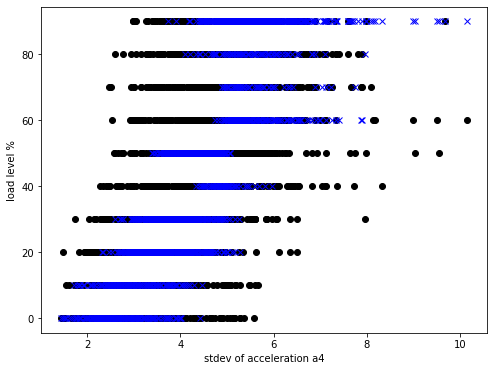

In [155]:
# Plot outputs: take X axis as the best stdev predictor (a4, see correlation matrix)
plt.plot(X_test['a4'], y_test, 'o', color='black');
plt.plot(X_test['a4'], y_pred, 'x', color='blue', linewidth=1)
plt.xlabel('stdev of acceleration a4')
plt.ylabel('load level %')

plt.show()